Драмбян Давид, БЭК186

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

1

In [2]:
np.random.seed(1000)
interval = np.random.choice([5, 10], p=[0.5, 0.5], size=10)
total = (20 - 8) * 60

In [3]:
def buses():
    time = 0
    cnt = 0
    peop = []
    pumba_arrival = np.random.randint(0, total)
    pumba_tick = 0
    while time < total:
        #np.random.seed(1)
        interval = np.random.choice([5, 10], p=[0.5, 0.5])
        peop.append(interval)
        if time <= pumba_arrival and time + interval >= pumba_arrival:
            pumba = interval
        time += interval
        cnt += 1
    return cnt, peop, pumba

In [4]:
bus_res = []
timon_check = []
pumba_check = []
for x in tqdm(range(10**4)):
    bus_res.append(buses()[0])
    timon_check.append(np.random.choice(buses()[1]))
    pumba_check.append(buses()[2])

#bus_res = np.random.choice([buses()[0]], size=10)

100%|██████████| 10000/10000 [00:54<00:00, 184.66it/s]


Text(0, 0.5, 'Number of simulations')

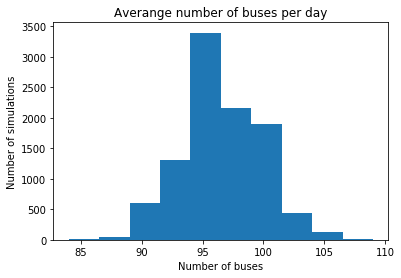

In [5]:
plt.hist(bus_res)
plt.title('Averange number of buses per day')
plt.xlabel('Number of buses')
plt.ylabel('Number of simulations')

Распределение визуально похоже на нормальное. 

Text(0, 0.5, 'Number of simulations')

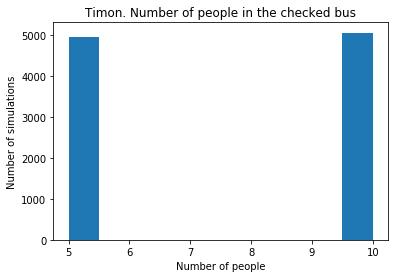

In [6]:
#check = np.random.choice(buses()[1], size=10**4)

plt.hist(timon_check)
plt.title('Timon. Number of people in the checked bus')
plt.xlabel('Number of people')
plt.ylabel('Number of simulations')

In [7]:
# Timon

mu = np.sum(timon_check) / 10**4
var = np.sum((np.array(timon_check)-mu)**2) / (10**4-1)

print('Оценка математического ожидания: {}'.format(mu))
print('Оценка дисперсии: {}'.format(var))

Оценка математического ожидания: 7.5285
Оценка дисперсии: 6.249812731273128


Text(0, 0.5, 'Number of simulations')

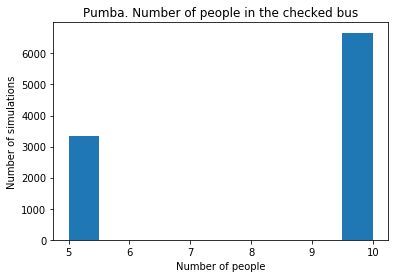

In [8]:
plt.hist(pumba_check)
plt.title('Pumba. Number of people in the checked bus')
plt.xlabel('Number of people')
plt.ylabel('Number of simulations')

In [9]:
# Pumba

mu = np.sum(pumba_check) / 10**4
var = np.sum((np.array(pumba_check)-mu)**2) / (10**4-1)

print('Оценка математического ожидания: {}'.format(mu))
print('Оценка дисперсии: {}'.format(var))

Оценка математического ожидания: 8.3325
Оценка дисперсии: 5.557499499949995


Очевидно, промежутки времени в 10 минут суммарно занимают бóльшую часть времени, поэтому распределение и математическое ожидание сместятся в сторону 10 пассажиров по сравнению со случаем выбора случайного автобуса, а не точки во времени. 

In [10]:
def buses_exp():
    time = 0
    cnt = 0
    peop = []
    pumba_arrival = np.random.randint(0, total)
    pumba_tick = 0
    while time < total:
        #np.random.seed(1)
        interval = round(np.random.exponential(10))
        peop.append(interval)
        if time <= pumba_arrival and time + interval >= pumba_arrival:
            pumba = interval
        time += interval
        cnt += 1
    return cnt, peop, pumba

In [11]:
bus_res = []
timon_check_exp = []
pumba_check_exp = []
for x in tqdm(range(10**4)):
    bus_res.append(buses_exp()[0])
    timon_check_exp.append(np.random.choice(buses_exp()[1]))
    pumba_check_exp.append(buses_exp()[2])

100%|██████████| 10000/10000 [00:06<00:00, 1585.10it/s]


Text(0, 0.5, 'Number of simulations')

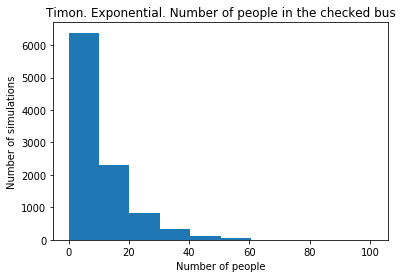

In [12]:
plt.hist(timon_check_exp)
plt.title('Timon. Exponential. Number of people in the checked bus')
plt.xlabel('Number of people')
plt.ylabel('Number of simulations')

In [13]:
# Timon Exponential

mu = np.sum(timon_check_exp) / 10**4
var = np.sum((np.array(timon_check_exp)-mu)**2) / (10**4-1)

print('Оценка математического ожидания: {}'.format(mu))
print('Оценка дисперсии: {}'.format(var))

Оценка математического ожидания: 10.164
Оценка дисперсии: 99.67927192719272


Text(0, 0.5, 'Number of simulations')

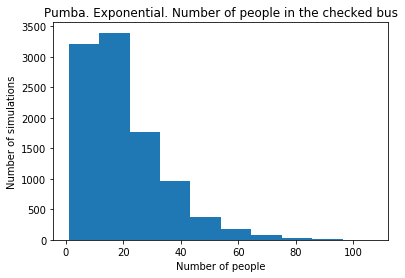

In [14]:
plt.hist(pumba_check_exp)
plt.title('Pumba. Exponential. Number of people in the checked bus')
plt.xlabel('Number of people')
plt.ylabel('Number of simulations')

In [15]:
# Pumba. Exponential

mu = np.sum(pumba_check_exp) / 10**4
var = np.sum((np.array(pumba_check_exp)-mu)**2) / (10**4-1)

print('Оценка математического ожидания: {}'.format(mu))
print('Оценка дисперсии: {}'.format(var))

Оценка математического ожидания: 19.8747
Оценка дисперсии: 193.15871578157814


Оценка математического ожидания сдвинется в бóльшую сторону, дисперсия увеличтся за счет появления редких, но значительно превышающих среднее значений. 

2 

In [16]:
np.random.seed(1000)
def a(assets, size):
    deltas = np.random.choice([1, -1], p=[0.49, 0.51], size=size)
    capital_change_trecker = np.tril(deltas)
    change = capital_change_trecker.sum(axis=1)
    return assets + change

def b(assets, size):
    res = []
    for x in range(size):
        if assets % 3 == 0:
            win = np.random.choice([1, -1], p=[0.09, 0.91])
            assets += win
            res.append(assets)
        else:
            win = np.random.choice([1, -1], p=[0.74, 0.26])
            assets += win
            res.append(assets)
    return np.array(res)

In [17]:
np.random.seed(1000)
def a_b(assets, size):
    res = []
    for x in range(size):
        choice = np.random.choice([1, 0], p=[0.5, 0.5])
        if choice == 1:
            win = np.random.choice([1, -1], p=[0.49, 0.51])
            assets += win
            res.append(assets + win)
        else:
            if assets % 3 == 0:
                win = np.random.choice([1, -1], p=[0.09, 0.91])
                assets += win
                res.append(assets)
            else:
                win = np.random.choice([1, -1], p=[0.74, 0.26])
                assets += win
                res.append(assets)
    return np.array(res)

In [18]:
atos = 1000
portos = 1000
aramis = 1000

In [19]:
at = np.empty((10**4, 1000), dtype=object)
por = np.empty((10**4, 1000), dtype=object)
ar = np.empty((10**4, 1000), dtype=object)

for x in tqdm(range(10**4)):
    at[x] = a(1000, 1000).tolist()
    por[x] = b(1000, 1000).tolist()
    #choice = np.random.choice([1, 0], p=[0.5, 0.5])
    #ar[x] = (choice * a(1000, 1000) + (1 - choice) * b(1000, 1000)).tolist()
    ar[x] = a_b(1000, 1000).tolist()

100%|██████████| 10000/10000 [08:44<00:00, 19.08it/s]


In [20]:
# def assets(delta):
#     delta = np.array(delta)
#     assets = np.zeros(1000, dtype=int)
#     assets[0] = 1000 + delta[0]
#     for i in range(1, len(delta)):
#         assets[i] = assets[i-1] + delta[i]
#     return assets

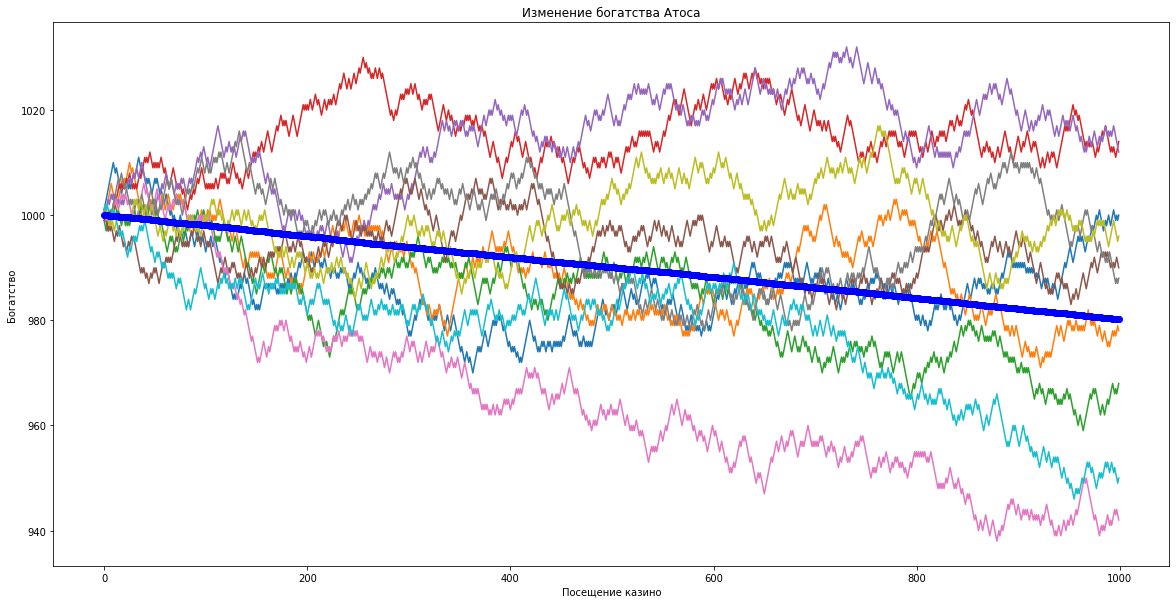

In [21]:
# АТОС
np.random.seed(1000)
n = np.arange(0, 10**4, 1)
np.random.shuffle(n)
n = n[:10]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.plot(at[n[0]])
ax.plot(at[n[1]])
ax.plot(at[n[2]])
ax.plot(at[n[3]])
ax.plot(at[n[4]])
ax.plot(at[n[5]])
ax.plot(at[n[6]])
ax.plot(at[n[7]])
ax.plot(at[n[8]])
ax.plot(at[n[9]])

mean_atos = at.mean(axis=0)
plt.plot(mean_atos, 'bo')

ax.set_title('Изменение богатства Атоса')
ax.set_xlabel('Посещение казино')
ax.set_ylabel('Богатство')

plt.show()

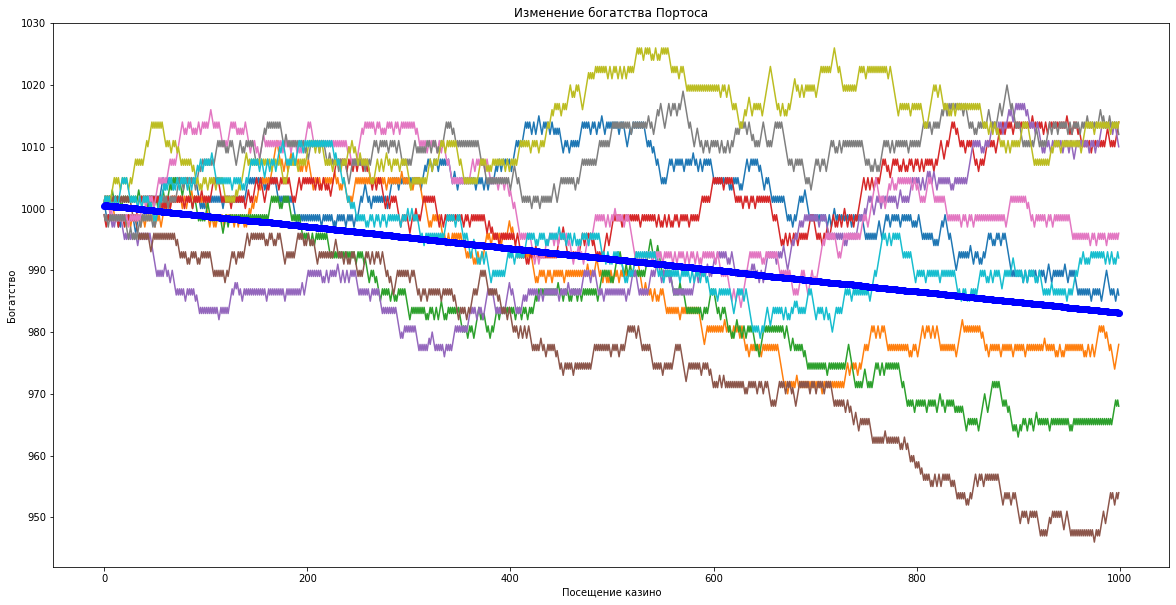

In [22]:
# ПОРТОС
np.random.seed(1000)
n = np.arange(0, 10**4, 1)
np.random.shuffle(n)
n = n[:10]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.plot(por[n[0]])
ax.plot(por[n[1]])
ax.plot(por[n[2]])
ax.plot(por[n[3]])
ax.plot(por[n[4]])
ax.plot(por[n[5]])
ax.plot(por[n[6]])
ax.plot(por[n[7]])
ax.plot(por[n[8]])
ax.plot(por[n[9]])

mean_por = por.mean(axis=0)
plt.plot(mean_por, 'bo')

ax.set_title('Изменение богатства Портоса')
ax.set_xlabel('Посещение казино')
ax.set_ylabel('Богатство')

plt.show()

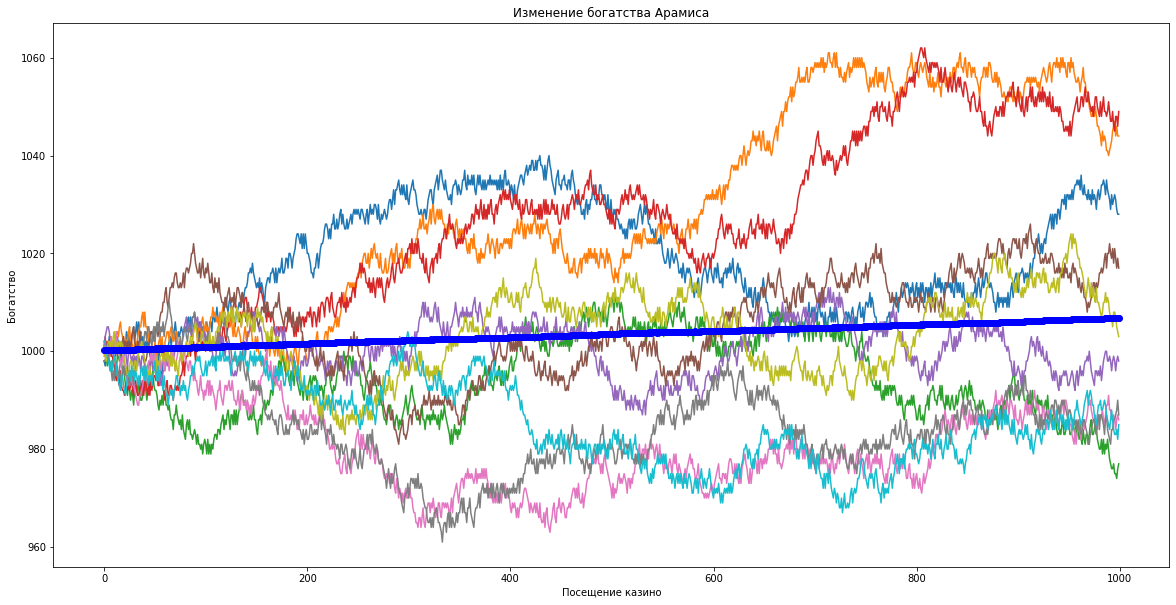

In [23]:
# АРАМИС
np.random.seed(1000)
n = np.arange(0, 10**4, 1)
np.random.shuffle(n)
n = n[:10]
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax.plot(ar[n[0]])
ax.plot(ar[n[1]])
ax.plot(ar[n[2]])
ax.plot(ar[n[3]])
ax.plot(ar[n[4]])
ax.plot(ar[n[5]])
ax.plot(ar[n[6]])
ax.plot(ar[n[7]])
ax.plot(ar[n[8]])
ax.plot(ar[n[9]])

mean_ar = ar.mean(axis=0)
plt.plot(mean_ar, 'bo')

ax.set_title('Изменение богатства Арамиса')
ax.set_xlabel('Посещение казино')
ax.set_ylabel('Богатство')

plt.show()

3

In [56]:
# поскольку иное не сказано, предположим, что баллы за экзамен принадлежат множеству действительных чисел
np.random.seed(1000)
entered = []
m = np.zeros((len(np.arange(80, 165, 5)), 10**4), dtype=float)
r = np.zeros((len(np.arange(80, 165, 5)), 10**4), dtype=float)
m_fail = np.zeros((len(np.arange(80, 165, 5)), 10**4), dtype=float)
r_fail = np.zeros((len(np.arange(80, 165, 5)), 10**4), dtype=float)
ress = []
for n in tqdm(np.arange(80, 165, 5)):
    math = np.random.normal(loc=60, scale=10, size=10**4)
    rus = np.random.normal(loc=60, scale=10, size=10**4)
    res = math + rus
    entered.append([n, len(res[res>n])])
    m[(n-80)//5] = np.where(res > n, math, None)
    r[(n-80)//5] = np.where(res > n, rus, None)
    m_fail[(n-80)//5] = np.where(res <= n, math, None)
    r_fail[(n-80)//5] = np.where(res <= n, rus, None)
    ress.append([n, res])

100%|██████████| 17/17 [00:00<00:00, 335.76it/s]


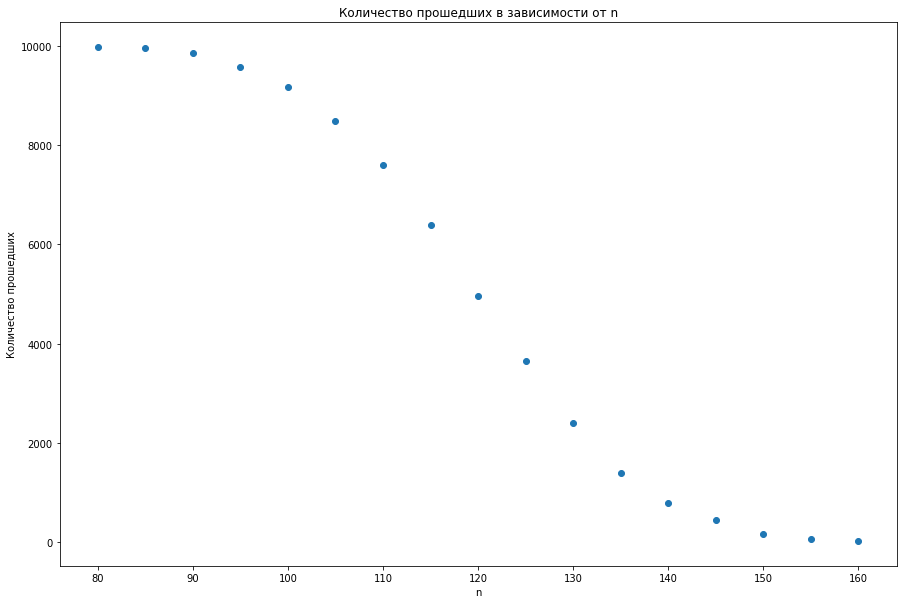

In [57]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlabel('n')
ax.set_ylabel('Количество прошедших')
ax.set_title('Количество прошедших в зависимости от n')
plt.scatter(np.array(entered)[:, 0], np.array(entered)[:, 1])

In [68]:
ent_corr = []
fail_corr = []
for i in range(len(m)):
    m_i = m[i][~np.isnan(m[i])]
    r_i = r[i][~np.isnan(r[i])]
    m_fail_i = m_fail[i][~np.isnan(m_fail[i])]
    r_fail_i = r_fail[i][~np.isnan(r_fail[i])]
    ent_corr.append(np.corrcoef(m_i, r_i)[0, 1])
    fail_corr.append(np.corrcoef(m_fail_i, r_fail_i)[0, 1])

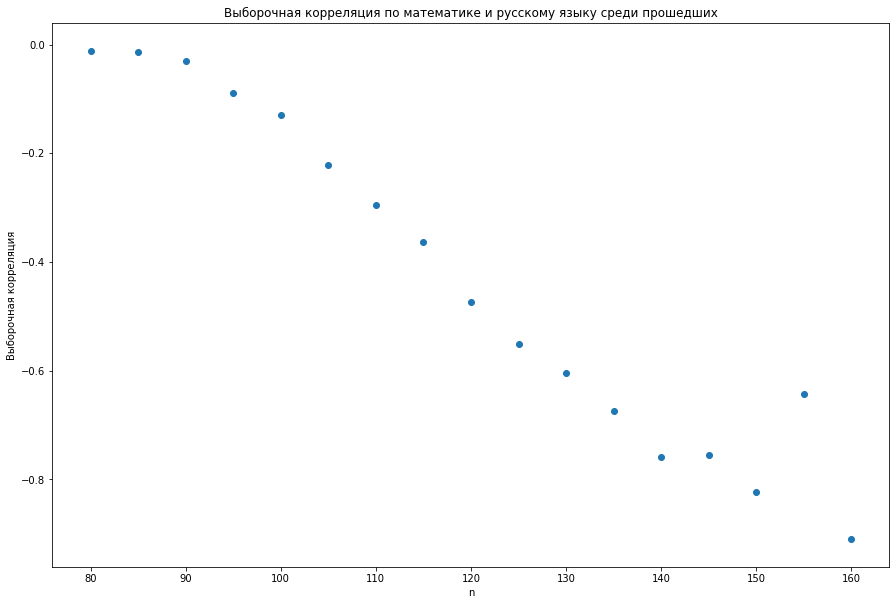

In [69]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlabel('n')
ax.set_ylabel('Выборочная корреляция')
ax.set_title('Выборочная корреляция по математике и русскому языку среди прошедших')
plt.scatter(np.arange(80, 165, 5), ent_corr)

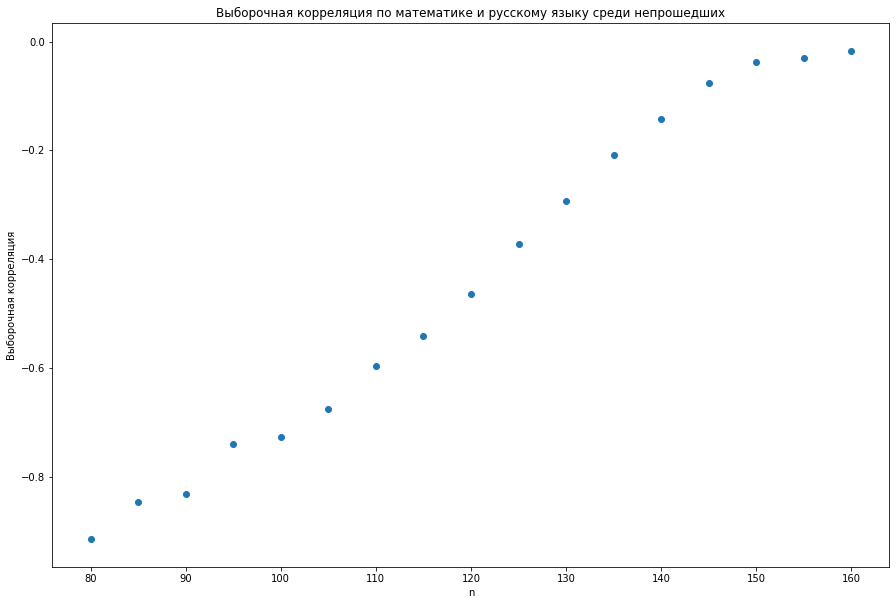

In [70]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(10)
ax.set_xlabel('n')
ax.set_ylabel('Выборочная корреляция')
ax.set_title('Выборочная корреляция по математике и русскому языку среди непрошедших')
plt.scatter(np.arange(80, 165, 5), fail_corr)

4

In [71]:
np.random.seed(1000)
x_mml = []
y_mml = []
z_mml = []
for i in range(10**4):
    x = np.random.normal(60, 10, size=100)
    y = np.random.normal(70, 10, size=100)
    z = np.random.normal(80, 10, size=100)

    mu_x = np.average(x)  # рассчитана методом максимального правдоподобия
    mu_y = np.average(y)  # рассчитана методом максимального правдоподобия
    mu_z = np.average(z)  # рассчитана методом максимального правдоподобия
    
    x_mml.append(mu_x)
    y_mml.append(mu_y)
    z_mml.append(mu_z)

Text(0.5, 0.98, 'MML-assesment of mu')

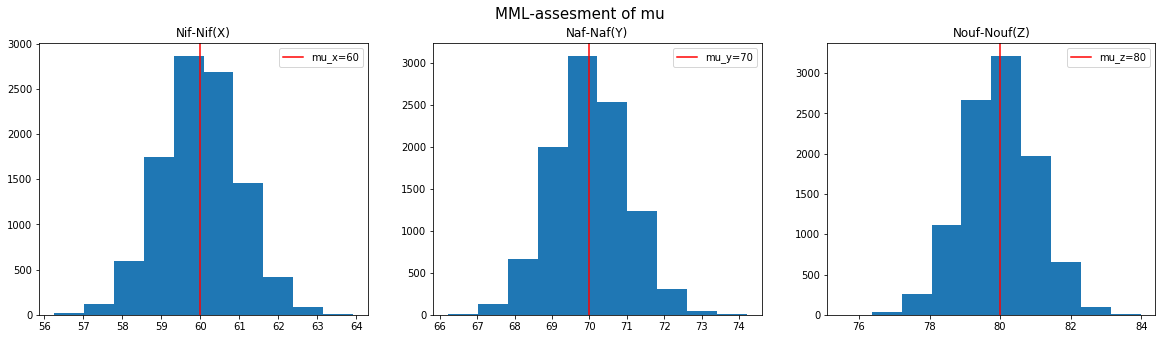

In [73]:
fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
ax[0].hist(x_mml)
ax[0].axvline(x=60, label='mu_x=60', c='r')
ax[0].set_title('Nif-Nif(X)')
ax[0].legend()

ax[1].hist(y_mml)
ax[1].axvline(x=70, label='mu_y=70', c='r')
ax[1].set_title('Naf-Naf(Y)')
ax[1].legend()

ax[2].hist(z_mml)
ax[2].axvline(x=80, label='mu_z=80', c='r')
ax[2].set_title('Nouf-Nouf(Z)')
ax[2].legend()

plt.suptitle('MML-assesment of mu', fontsize=15)

Text(0.5, 0, 'SSE')

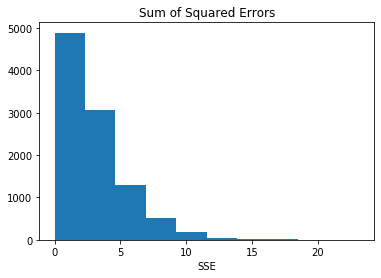

In [74]:
sse = (np.array(x_mml) - 60)**2 + (np.array(y_mml) - 70)**2 + (np.array(z_mml) - 80)**2
plt.hist(sse)
plt.title('Sum of Squared Errors')
plt.xlabel('SSE')

In [75]:
print('The mean of SSE is {}'.format(np.mean(sse)))

The mean of SSE is 3.0207812747557985


Text(0.5, 1.0, 'mu_x_mml and mu_y_mml')

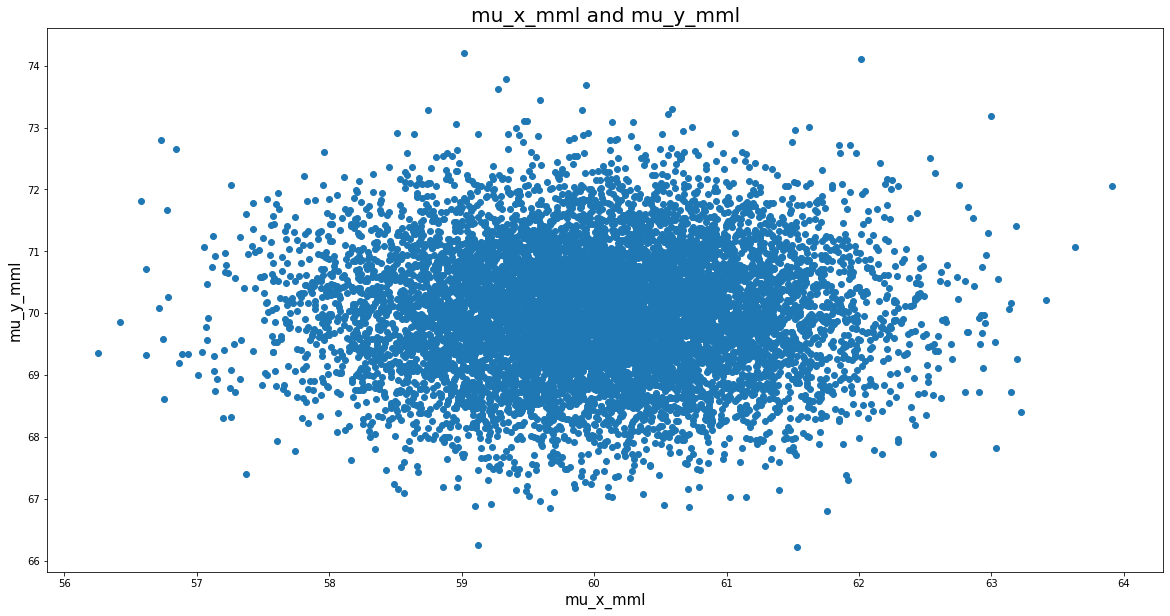

In [76]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
plt.scatter(x_mml, y_mml)
plt.xlabel('mu_x_mml', fontsize=15)
plt.ylabel('mu_y_mml', fontsize=15)
plt.title('mu_x_mml and mu_y_mml', fontsize=20)

In [77]:
print('Correlation: {}'.format(np.corrcoef(np.array(x_mml), np.array(y_mml))[0, 1]))

Correlation: 0.0031232986357669907
